# Pypsdier: A jupyter notebook example
This is a toy example for testing the pypsdier library. It features a single concentration, 3 particle radii, and a simple reaction equation. Parameters have been chosen so the numerical simulation is computed fast for instructional purposes.

## Installation
Installing the library is easy. You can choose to install the last pypi release, or the last version directly from the github repo.

In [1]:
#!pip install pypsdier --upgrade
!pip install git+https://github.com/sebastiandres/pypsdier.git --upgrade

  Cloning https://github.com/sebastiandres/pypsdier.git to /private/var/folders/68/v1ds0ld152q_wk4sbcns3ckw0000gn/T/pip-req-build-btxadxsp
  Running command git clone -q https://github.com/sebastiandres/pypsdier.git /private/var/folders/68/v1ds0ld152q_wk4sbcns3ckw0000gn/T/pip-req-build-btxadxsp
  Created wheel for pypsdier: filename=pypsdier-1.1.1-cp37-none-any.whl size=14659 sha256=838a29b9bd9db00c706fba6fae6bd41004a891c40742f3cccf0e366a23afc77d
  Stored in directory: /private/var/folders/68/v1ds0ld152q_wk4sbcns3ckw0000gn/T/pip-ephem-wheel-cache-_mbl6tfy/wheels/57/71/0f/2f6f43ab73e6371b622a1e181130163a445c394d19b74a80d1
Successfully built pypsdier
  Found existing installation: pypsdier 1.1.1
ERROR: Cannot uninstall 'pypsdier'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


Check that you have the required libraries:

In [3]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install dill
!pip install xlwt

## Setting up the experiment

The first thing is to setup the inputs and plotting options.

This requires to define dictionaries with specific keys.

In [4]:
def MichaelisMenten(S, E0, k, K):
  """Definition for Michaelis Menten reaction with inputs E0 [mM], k [1/s] and K [mM]"""
  return (-k*E0*S[0]/(K+S[0]), )

inputs = {}
inputs["SimulationTime"] = 120. # [s]
inputs["SavingTimeStep"] = 1. # [s]
inputs["CatalystVolume"] = 0.5 # [mL]
inputs["BulkVolume"]  = 100.0  # [mL]
inputs["Names"] = ('Substrat',)  # legend for the xls, reports and plots
inputs["InitialConcentrations"] = (1.3,)   # [mM]
inputs["EffectiveDiffusionCoefficients"] = (5.3E-10,)  # [m2/s]
inputs["CatalystParticleRadius"] = [40.0E-6, 60.0E-6, 80.0E-6] # [m]
inputs["CatalystParticleRadiusFrequency"] = [0.3, 0.5, 0.2] # []
inputs["ReactionFunction"] = MichaelisMenten # function 
inputs["ReactionParameters"] = (41 , 0.13)   # [1/s], [mM/s], parameters
inputs["CatalystEnzymeConcentration"] = 0.35 # [mM]

plot_options = {}
plot_options["title"] = "Simulación de Michaelis Menten para la PyconAr"
plot_options["label_x"] = "Tiempo de reacción [s]"
plot_options["label_y"] = "Concentración [mM]"
plot_options["ode_kwargs"] = {'label':'ode', 'color':'black', 'marker':'', 'markersize':6, 'linestyle':'dashed', 'linewidth':2}
plot_options["pde_kwargs"] = {'label':'pde', 'color':'black', 'marker':'', 'markersize':6, 'linestyle':'solid', 'linewidth':2}
plot_options["data_kwargs"] = {'label':'exp', 'color':'red', 'marker':'s', 'markersize':6, 'linestyle':'none', 'linewidth':2}
plot_options["data_x"] = [0.0, 30, 60, 90, 120]
plot_options["data_y"] = [1.3, 0.65, 0.25, 0.10, 0.0]

## Creating a simulation
Creating a new simulation requires to use a new simulation interface. 

In [5]:
import pypsdier
SIM1 = pypsdier.SimulationInterface()
SIM1.new(inputs, plot_options)

## Numerical simulation 
To simulate you need to the corresponding method:

In [6]:
SIM1.simulate("pde")
SIM1.simulate("ode")

PDE: Solving the complete reaction-diffusion problem, considering a single substance and 3 particle radii.
Simulated 120 secs out of 120 secs (Remaining time 0 mins) ) 
ODE: Solving without diffusional restriction (simplified problem). No porous particles are present. The substance and the enzyme are assumed to be diluted on the bulk phase
Simulation completed.


## Status
At any point of the code you can use the `status` method to know if the required libraries are installed, what are the inputs, plot options and simulation statuses.

In [7]:
SIM1.status()

System configuration:
    environment: python
    python version: 3.7.4
    GenericSimulationLibrary version: 1.1.1
    numpy version: 1.17.2
    scipy version: 1.2.1
    xlwt version: 1.3.0
    matplotlib version: 3.0.3
    dill version: 0.3.2
Inputs:
    SimulationTime: 120.0
    SavingTimeStep: 1.0
    CatalystVolume: 0.5
    BulkVolume: 100.0
    Names: ('Substrat',)
    InitialConcentrations: (1.3,)
    EffectiveDiffusionCoefficients: (5.3e-10,)
    CatalystParticleRadius: [4e-05, 6e-05, 8e-05]
    CatalystParticleRadiusFrequency: [0.3, 0.5, 0.2]
    ReactionFunction: <function MichaelisMenten at 0x1178d39e0>
    ReactionParameters: (41, 0.13)
    CatalystEnzymeConcentration: 0.35
Plot Options:
    title: Simulación de Michaelis Menten para la PyconAr
    label_x: Tiempo de reacción [s]
    label_y: Concentración [mM]
    ode_kwargs: {'label': 'ode', 'color': 'black', 'marker': '', 'markersize': 6, 'linestyle': 'dashed', 'linewidth': 2}
    pde_kwargs: {'label': 'pde', 'color': 'b

## Plotting
You can plot the results with the `plot` method. If needed, you can update the plot_options dictionary.
Use `plot?` to know available plotting arguments.

In [8]:
SIM1.plot?

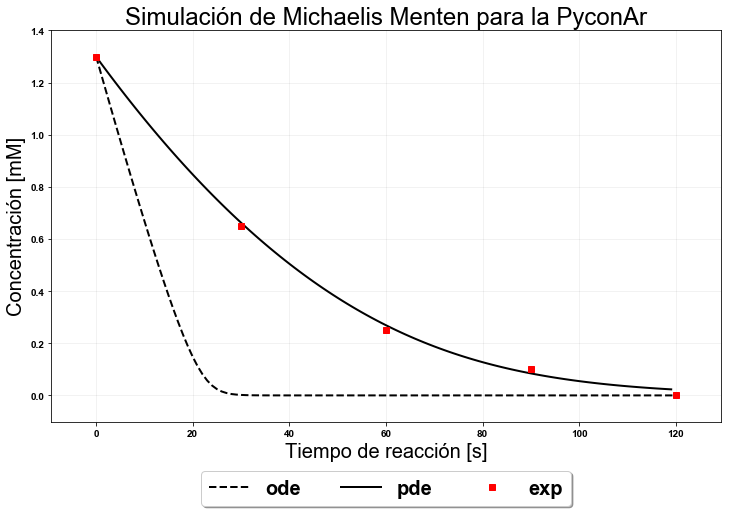

In [15]:
SIM1.plot()

## Download
You can generate and download a compressed simulation file, so you can late load your results

In [14]:
SIM1.save("SIM1.rde")

Saving simulation into file at /Users/sebastiandres/Desktop/Personales/pypsdier/pypsdier/demo/SIM1.rde


Or you can generate an excel file to explore the results to use a more familiar program.

In [12]:
SIM1.export_xls("SIM1.xls")

Saving simulation as xls file at /Users/sebastiandres/Desktop/Personales/pypsdier/pypsdier/demo/SIM1.xls
